# Example: REV analysis for PD

This example demonstrates how to perform REV analysis for persistence diagrams (PD).

PD is a set of "birth"-"death" persistence pairs located at $XY$ coordinate plane. 

Using our library, one can perform REV analysis for PD$_0$, PD$_1$ and PD$_2$ - persistence diagrams of rank 0, 1 and 3, respectively. Four different vectorization methods, mapping 2D PD structure into 1D vector, are available: simple binnig, persistence image, landscape and silhouette.

Here, we present REV analysis of PD with PD$_0$ and PD$_1$ metrics and simple binnig vectorization method.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import PD0, PD1
from revanalyzer.vectorizers import SimpleBinningVectorizer

[12:36:01] ERROR    PARDISO solver not installed, run `pip install           ]8;id=1732008961.2610023-289659;file:///home/azubov/miniconda3/lib/python3.9/site-packages/openpnm/utils/_workspace.py\_workspace.py]8;;\:56
                    pypardiso`. Otherwise, simulations will be slow. Apple M                 
                    chips not supported.

In [2]:
#initialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'

bins = 20 #number of bins at each axe in XY plane.
skip_zeros = True # If True, bins of 2D histogram empty for both compared PDs are not included into the final vectors;
                  #default: True.
vectorizer = SimpleBinningVectorizer(bins) #vectorizer inizialization

n_threads = 32 #number of CPU cores used by PD generator, default: 1

show_time = True #default: False. Added to monitor time cost for large images.

metric = PD0(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
#generate metric data for all the subsamples:
analyzer.generate()

cut  cut1_6 , run time: 
cut --- 0.3513805866241455 seconds --- 
cut1_8 , run time: 
--- 0.3529324531555176 seconds ---
cut  cut1_3 , run time: 
--- 0.36348986625671387 seconds ---
cut  cut1_1 , run time: 
--- 0.3737199306488037 seconds ---
cut  cut1_7 cut , run time: 
 --- 0.37259674072265625 seconds ---
cut1_2 , run time: 
--- 0.38187551498413086 seconds ---
cut cut   cut1_0 cut1_5, run time: 
 --- 0.39867234230041504 seconds ---, run time: 

--- 0.39225125312805176 seconds ---
cut  cut1_4 , run time: 
--- 0.408123254776001 seconds ---
cut  cut2_1 , run time: 
--- 2.8700523376464844 seconds ---
cut  cut2_3 , run time: 
--- 2.9393670558929443 seconds ---
cut  cut2_4 , run time: 
--- 2.964693784713745 seconds ---
cut  cut2_0 , run time: 
--- 3.017699956893921 seconds ---
cut  cut2_2 , run time: 
--- 3.0271384716033936 seconds ---
cut  cut2_8 , run time: 
--- 2.9956116676330566 seconds ---
cut  cut2_5 , run time: 
--- 3.0562820434570312 seconds ---
cut  cut2_7 , run time: 
--- 3.1794881

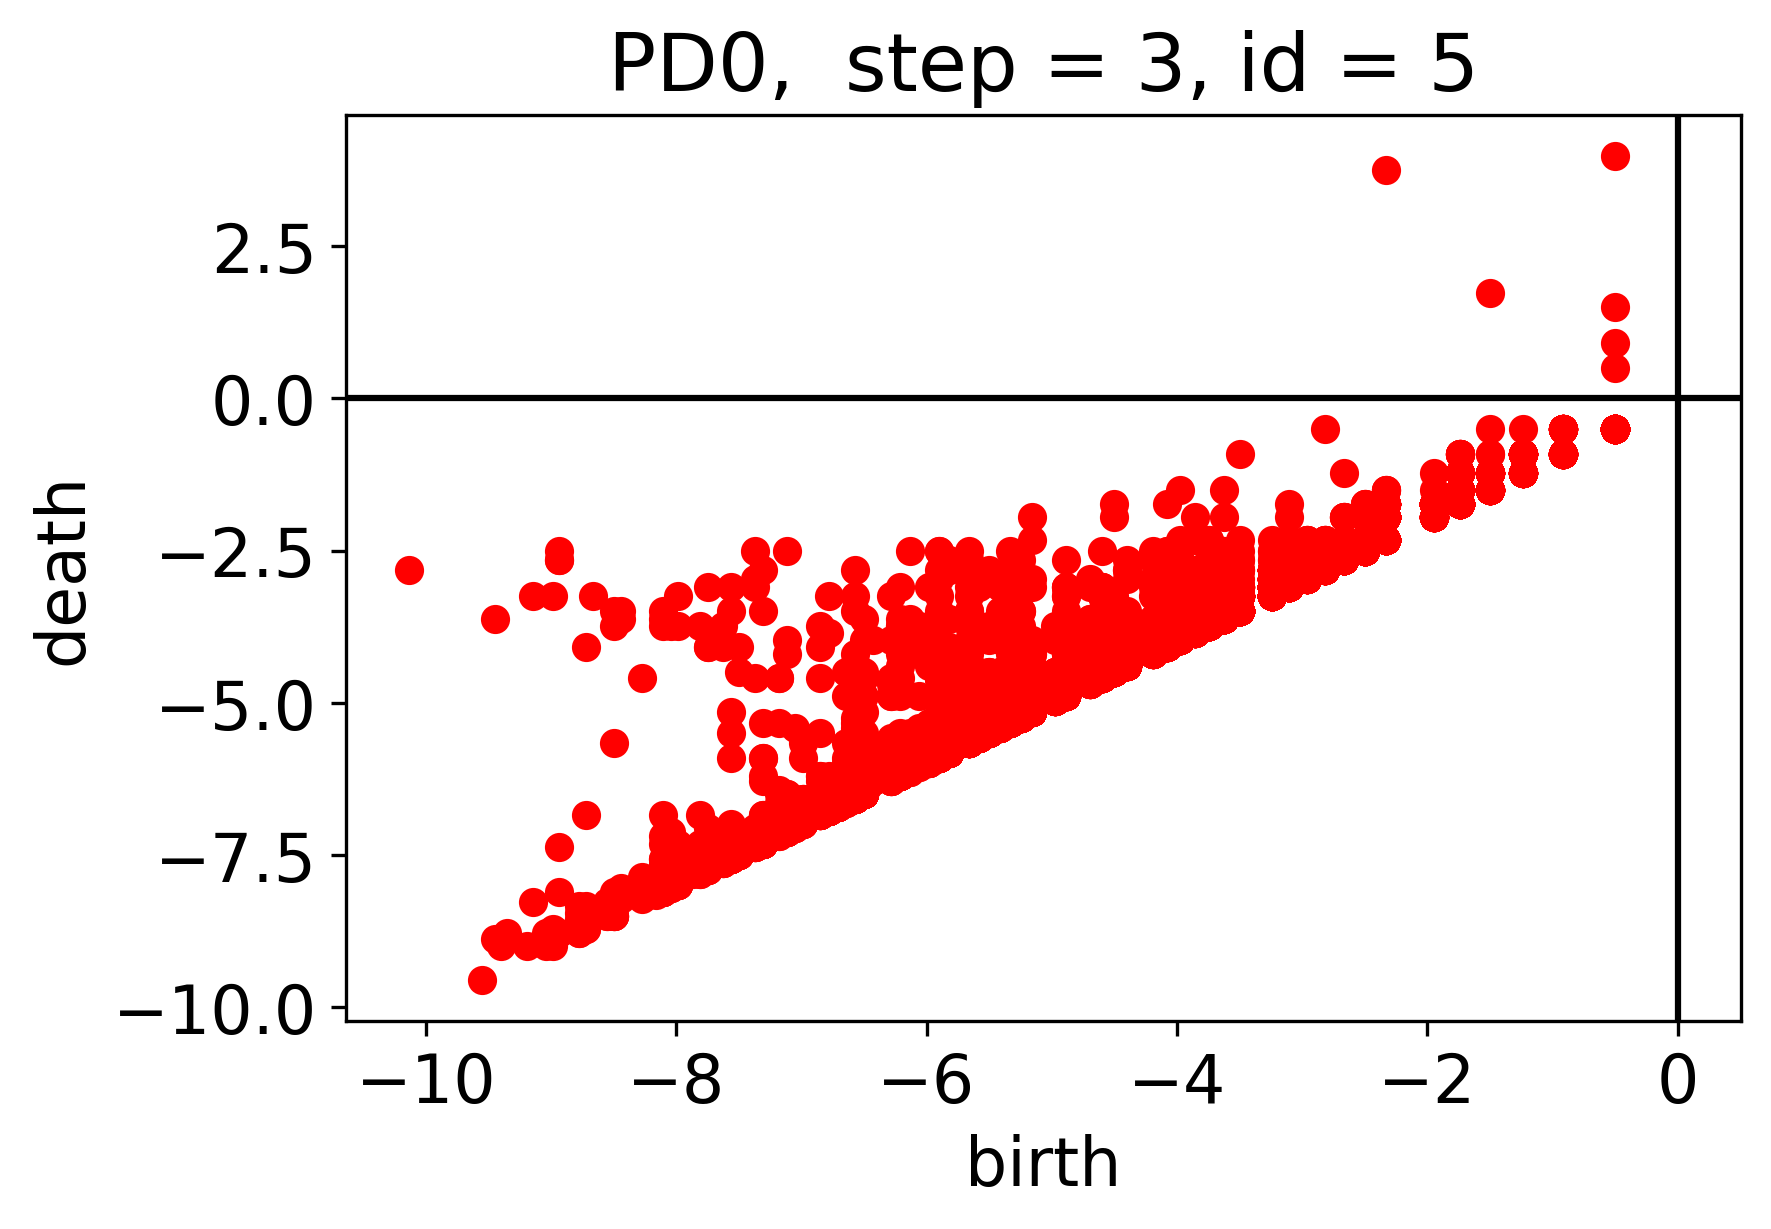

In [4]:
#Visualize PD for a given subcube:
analyzer.show(step = 3, cut_id = 5)

In [5]:
#vectorization
analyzer.vectorize()

In [6]:
#fix thresholds and analyze vectorized data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [7]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.3471115048746215, 2: 0.131745375871384, 3: 0.06896582042003825, 4: 0.03827876336197605, 5: 0.018192879534570286}
{1: 0.1088272112085674, 2: 0.05068842392024816, 3: 0.02278294155901496, 4: 0.010675361651828016}
{1: 0.544136056042837, 2: 0.2534421196012408, 3: 0.1139147077950748, 4: 0.05337680825914008}
{1: 0.3135223398829041, 2: 0.2534421196012408, 3: 0.1139147077950748, 4: 0.05337680825914008}


In [8]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

100
150
150


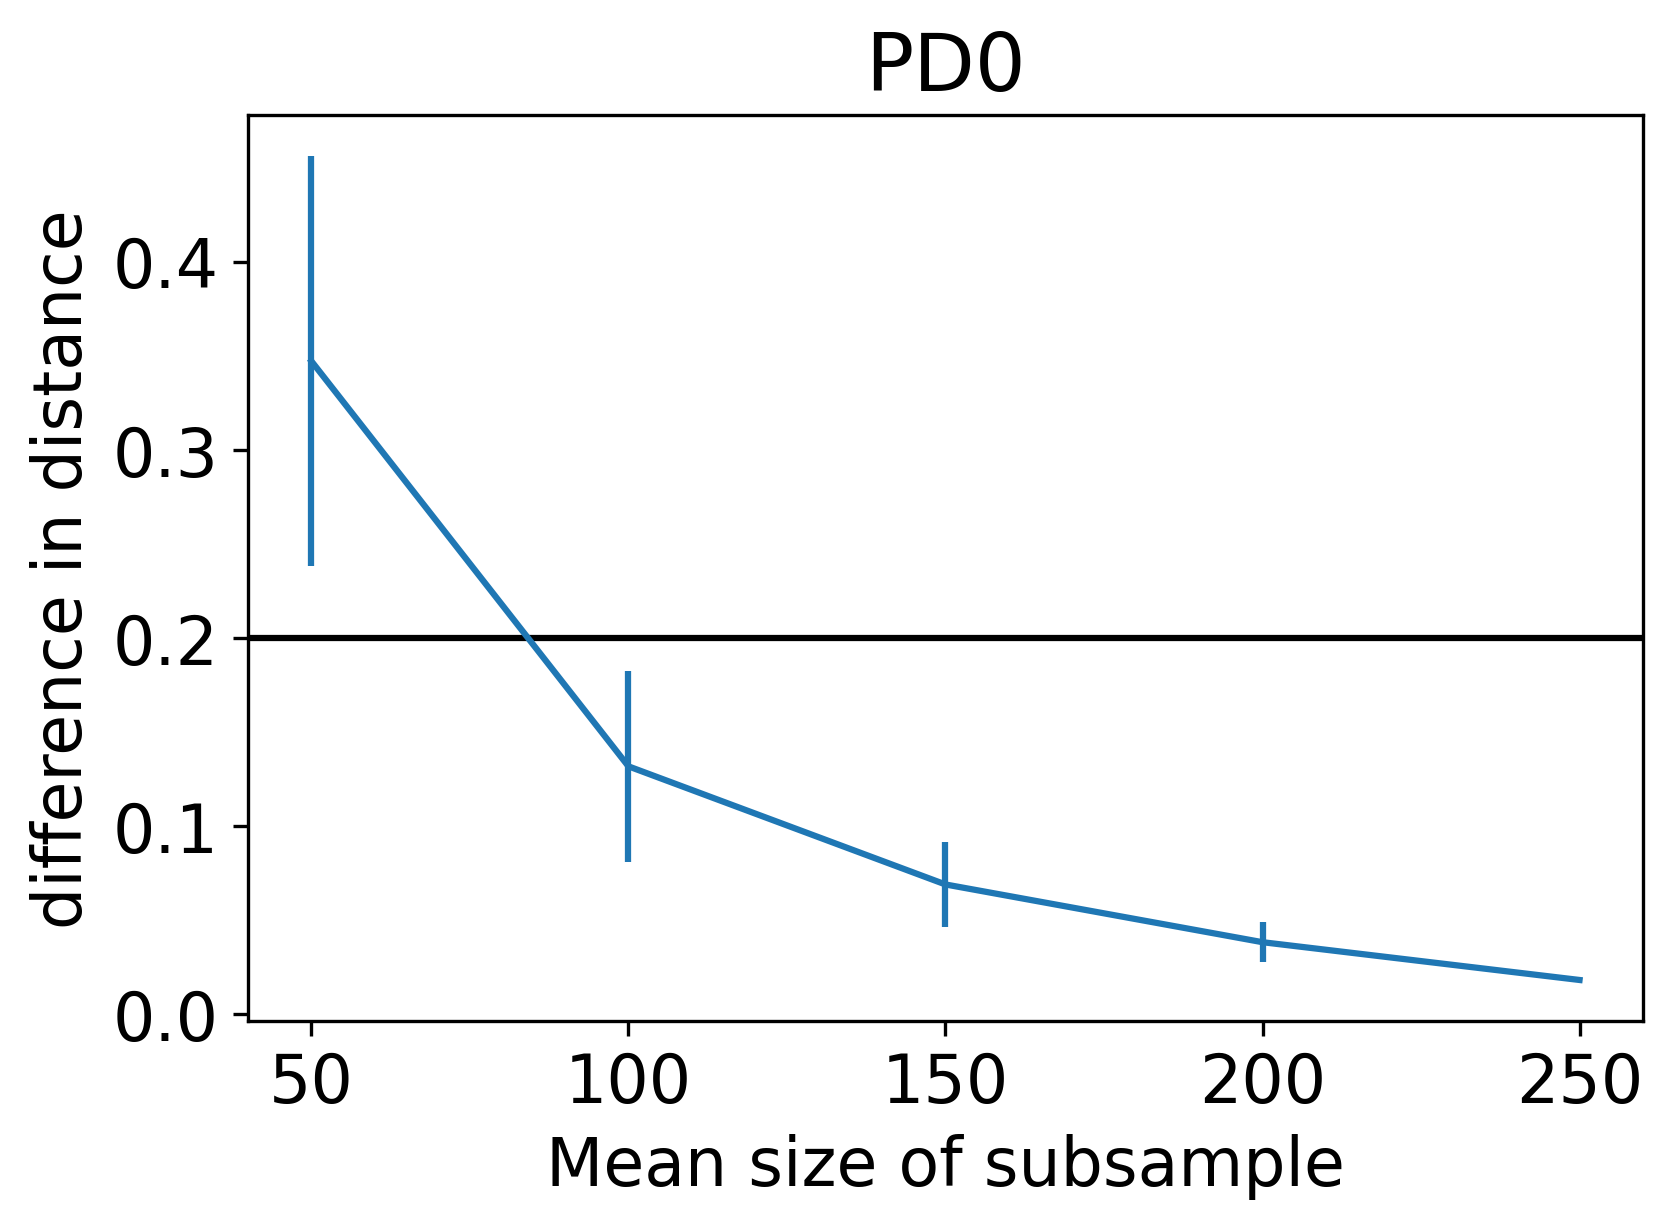

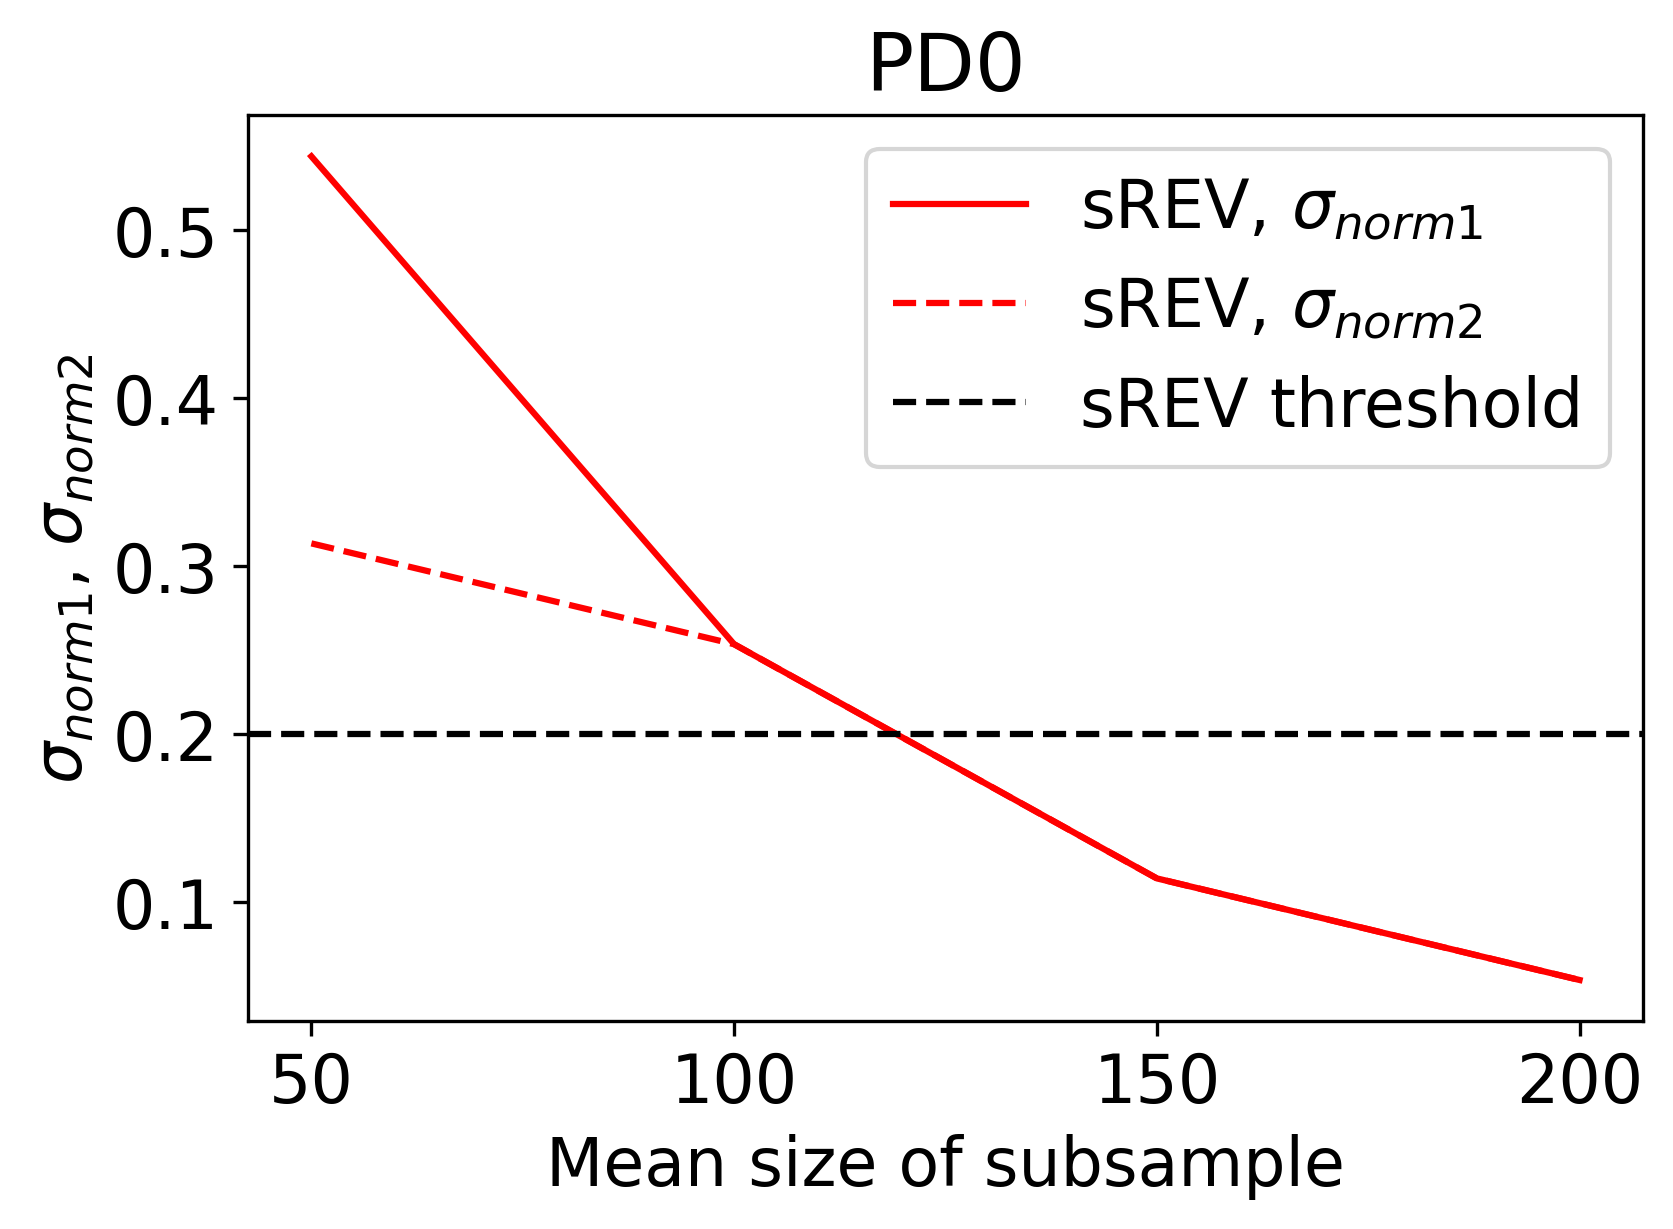

In [9]:
analyzer.show_results()

In [10]:
#Note PD generator generates both PD0, PD1 and PD2 data, whenever one of this metrics is chosen. 
#So calling the method generate() can be skiped, if one wants now to consider PD1 metric.

metric = PD1(vectorizer = vectorizer, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

analyzer.vectorize()

analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [11]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

{1: 0.348785423651263, 2: 0.13676435912301968, 3: 0.06132720692927269, 4: 0.035298885242863745, 5: 0.019610180189646498}
{1: 0.12131246860489787, 2: 0.042674885218899984, 3: 0.019378256851640643, 4: 0.006373539009549398}
{1: 0.6065623430244893, 2: 0.2133744260944999, 3: 0.09689128425820322, 4: 0.03186769504774699}
{1: 0.34781404376059444, 2: 0.2133744260944999, 3: 0.09689128425820322, 4: 0.03186769504774699}
100
150
150


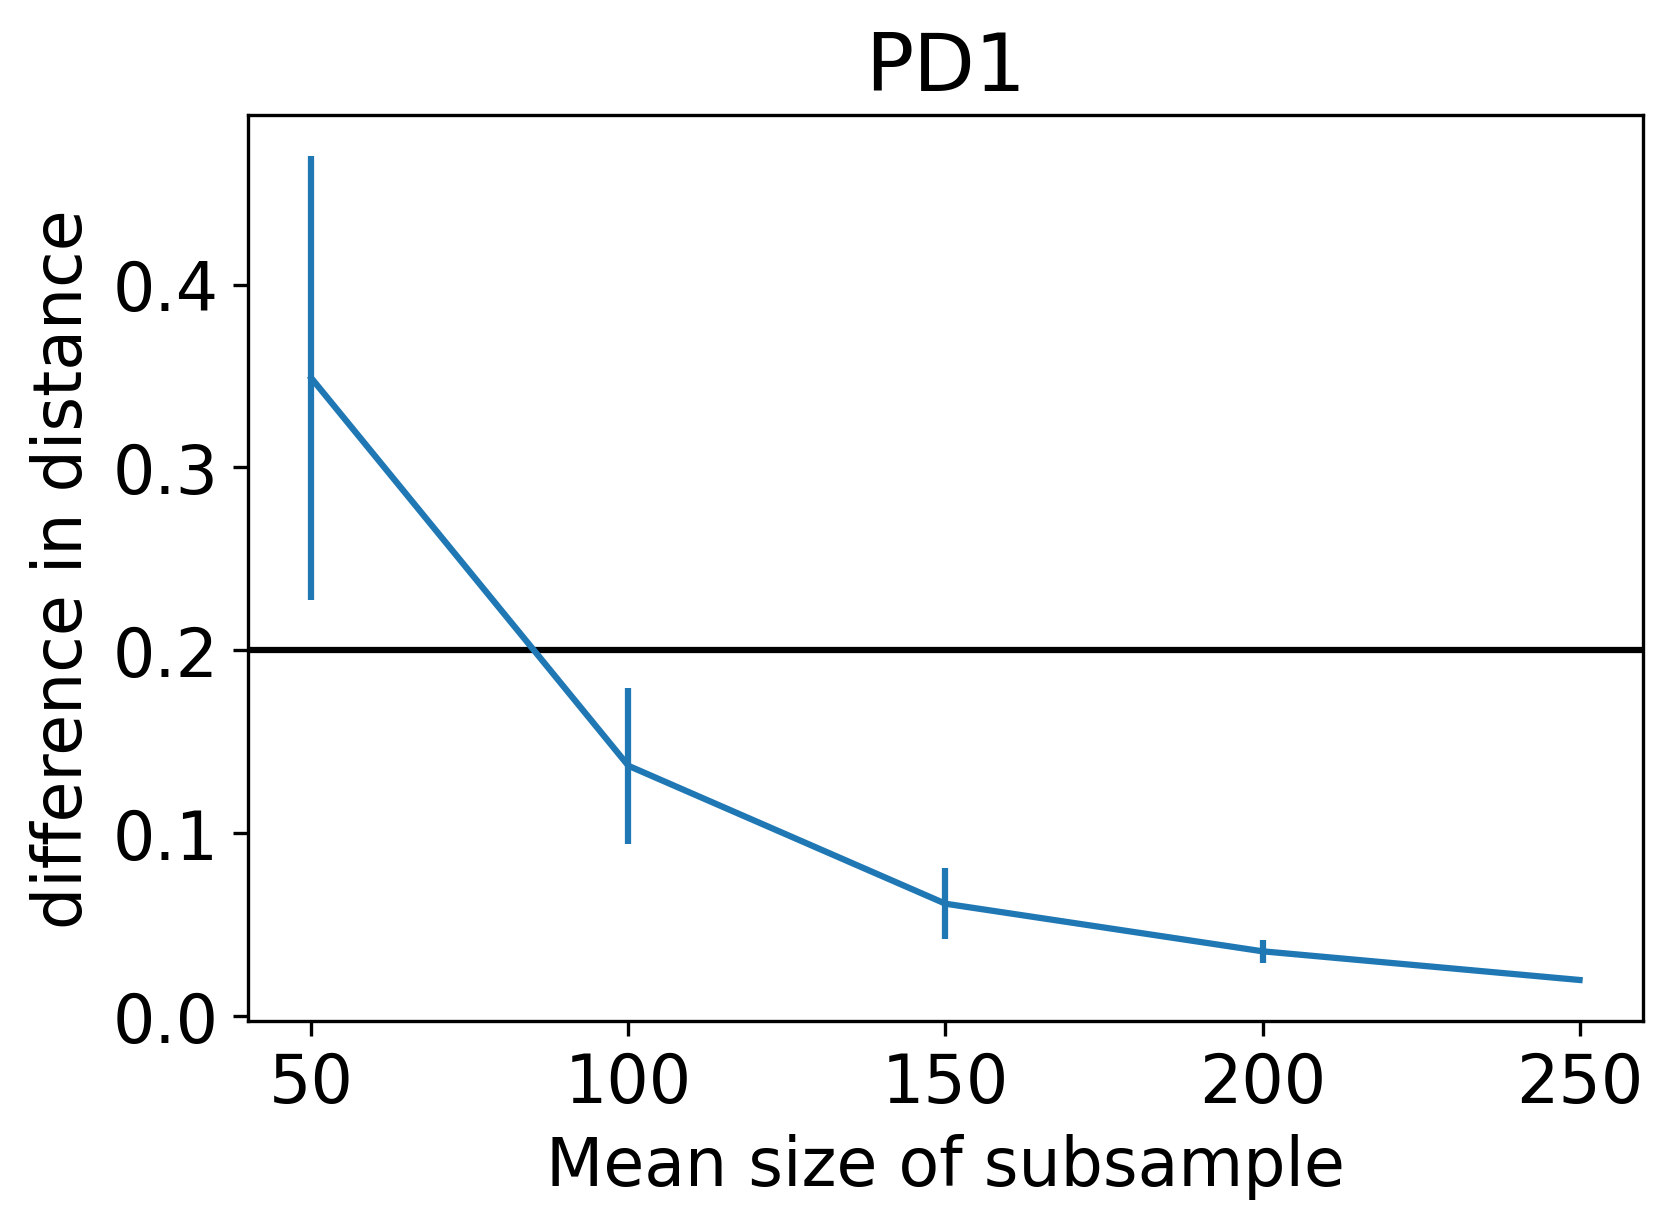

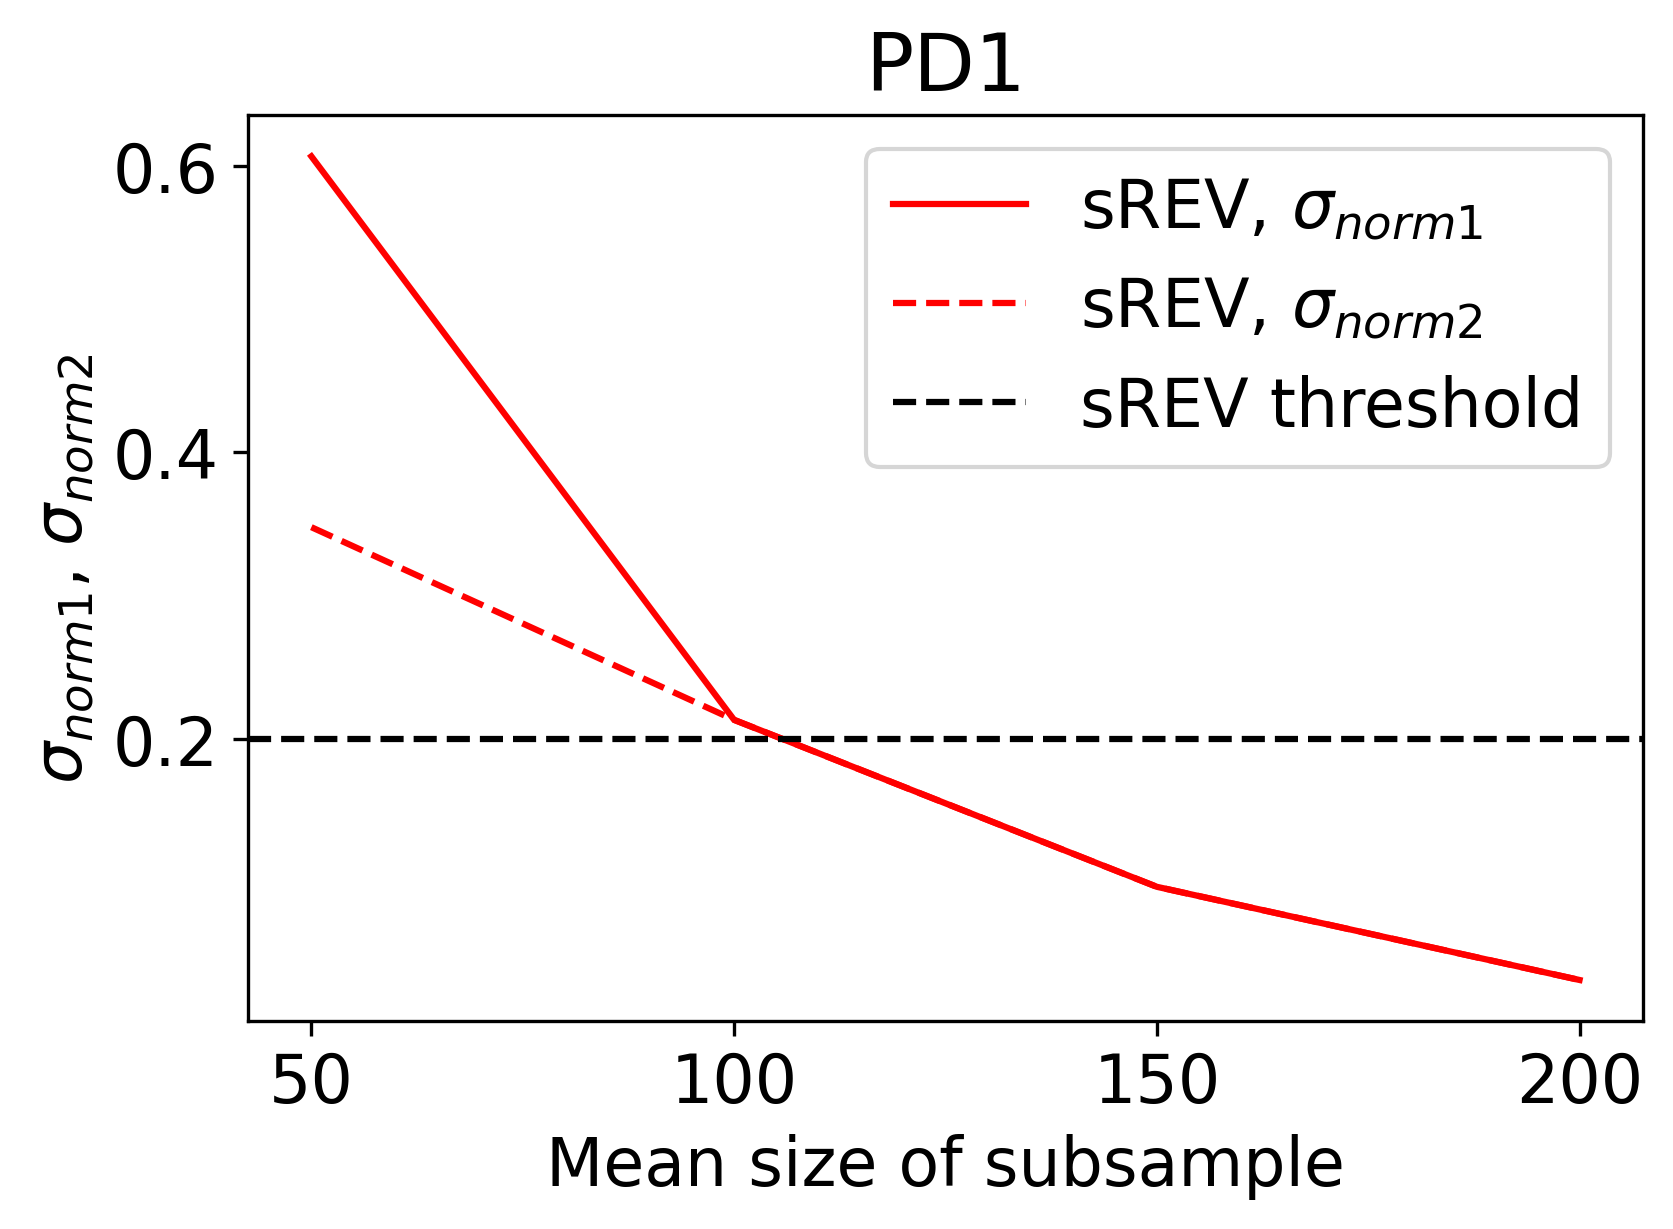

In [12]:
analyzer.show_results()